In [49]:
from simulator.image_creation import *
import cv2
import subprocess
import matplotlib.pyplot as plt
import re, numpy

ModuleNotFoundError: No module named 'PiCamera'

In [51]:
!sudo pip install picamera

Password:


# On choisit un fond

In [4]:
! ls ../ground

IMG_1417.JPG IMG_3837.JPG IMG_5993.JPG


In [28]:
def ppm_to_numpy(filename=None, buffer=None, byteorder='>', numpy_found=True):
    """Return image data from a raw PGM/PPM file as numpy array.
    Format specification: http://netpbm.sourceforge.net/doc/pgm.html
    """

    if not numpy_found:
        raise IOError("Function ppm_to_numpy requires numpy installed.")

    if buffer is None:
        with open(filename, 'rb') as f:
            buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P\d\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PPM/PGM file: '%s'" % filename)

    cols_per_pixels = 1 if header.startswith(b"P5") else 3

    dtype = 'uint8' if int(maxval) < 256 else byteorder+'uint16'
    arr = numpy.frombuffer(buffer, dtype=dtype,
                           count=int(width)*int(height)*3,
                           offset=len(header))

    return arr.reshape((int(height), int(width), 3))


In [5]:
img = cv2.resize(cv2.imread('../ground/IMG_1417.JPG'), (1000, 1000))

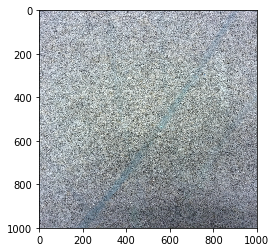

In [6]:
plt.imshow(img)

# On trace des lignes à partir d'un point

In [7]:
origin_pt = (400, 1000)
end_pt = (1000, 200)
radius = 2000
origin = Point(origin_pt[0], origin_pt[1])
end = Point(end_pt[0], end_pt[1])
cmd = int(compute_command_arc(origin, end, radius))

In [8]:
# Commande en degré à partir de l'axe des abscisses 
print(cmd)

67


In [9]:
img_drawn = draw_central_dashed_arc_on_ground(img, origin, end, radius, (148, 252, 9))

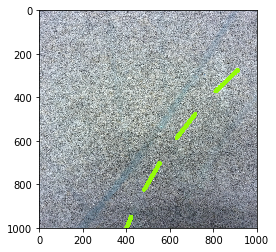

In [10]:
plt.imshow(img_drawn)

In [11]:
img_complete = draw_lateral_complete_arcs_on_ground(img_drawn, origin, end, radius, (255, 255, 255))

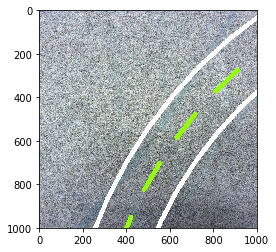

In [12]:
plt.imshow(img_complete)

In [13]:
img_final = 255 * np.ones((3 * img.shape[0], 4 * img.shape[1], 3), dtype='uint8')
img_final[2 * img.shape[0]:, img.shape[1]:2 * img.shape[1], :] = img_complete

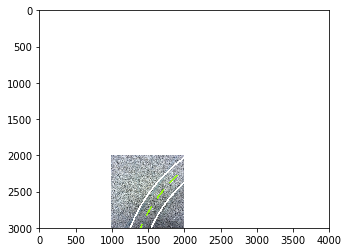

In [14]:
plt.imshow(img_final)

# On applique la perspective

In [15]:
PHOTOS_PATH = '../photos/'

In [16]:
plt.imsave(PHOTOS_PATH + 'test.jpg', img_final)
command = 'povray -Ipovray_test_cob.pov.j2 Height=176 Width=240 Output_File_Type=P -O-'.format(
        int(cmd))

# Résultat

In [17]:
resultat = cv2.imread('../photos/test_cmd_test.png')

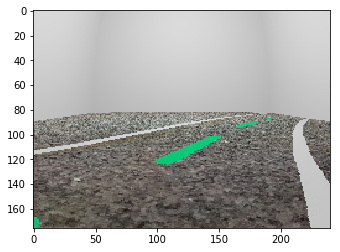

In [18]:
plt.imshow(resultat)

# Utilisation de vapory

In [19]:
cmd = ['povray', '-Ipovray_test_cob.pov.j2','Height=176','Width=240','Output_File_Type=P','-O-']

process = subprocess.Popen(cmd, stderr=subprocess.PIPE,
                                    stdin=subprocess.PIPE,
                                    stdout=subprocess.PIPE, cwd = PHOTOS_PATH)

out,err = process.communicate()

In [44]:
image = ppm_to_numpy(buffer=out)[80:]

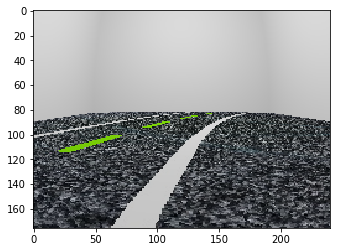

In [45]:
plt.imshow(ppm_to_numpy(buffer=out))

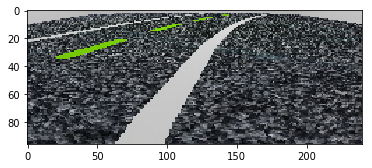

In [47]:
plt.imshow(image)

In [52]:
import vapory

In [ ]:
#include "colors.inc"

camera {
  ultra_wide_angle
  location <500, 60, 0>
  look_at  <500, 50, 100>
}
box {
  <0, 0, 0>,
  < 1000, 1000, 1000>
  // http://www.f-lohmueller.de/pov_tut/backgrnd/p_sky9.htm
  texture {
    uv_mapping
    pigment {
      image_map {
        jpeg "test_small.jpg" once map_type 0
      }
    }
  }
}
light_source { <500, 500, 500> color White}


In [55]:
camera =  vapory.Camera('location',  [500, 60, 0], 'look_at',[500, 50, 100])

In [68]:
from jinja2 import Environment, PackageLoader

In [72]:
template = Environment(loader = PackageLoader('../photos'))

ModuleNotFoundError: No module named '.'

In [74]:
import jinja2

In [92]:
cmd =  ['povray', '-I', '9f9831436f5441cbad4578e7b04f0531.j2', 'Height=176', 'Width=240', 'Output_File_Type=P', '-O-']

In [93]:
process = subprocess.Popen(cmd, stderr=subprocess.PIPE,
                               stdin=subprocess.PIPE,
                               stdout=subprocess.PIPE, cwd=PHOTOS_PATH)

In [94]:
out, err = process.communicate()

In [95]:
print(out)

b''
